In [1]:
# Implement line wrapping
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <Style>
    pre{
      white-space: pre-wrapped;
    }
  </Style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# **1. Loading the Dataset.**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The above libraries are imported for the follwing reasons:


*   **Pandas**: For formatting and manipulating datasets. 
*   **Numpy**: For performing scientific mathematical opreations.
*   **Matplotlib**: For data visualization as charts.



In [9]:
#Loading the dataset
coaster_df = pd.read_csv("/content/coaster_db.csv")
coaster_df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
# Get number of rows and columns
coaster_df.shape

(1087, 56)

As shown above, the pandas' **read_csv()** method is used to convert the **coaster_db.csv** file as a dataframe and it is then stored in the **coaster_df** variable.
The head() function is then used to output the first 5 rows of the dataframe to ensure that the dataset has been properly imported. From the pandas shape attribute output, it can also be observed that the dataset has 1087 rows and 56 columns.

# **2. Data Cleaning.**

In [4]:
# Identify missing values
print(coaster_df.isna().sum())

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

As shown in the output above provided by the isna().sum() method call, the concerned dataset contains a lot of missing values.





In [5]:
# Determine the type of each column
coaster_df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In order to know how to handle the missing values in each column, it is imperative that each of their data types are known as categorical columns should only be imputed with their mode while it is preferable to impute numerical columns with their mean or median value.

In [6]:
#initializing arrays to store numerical and categorical columns with missing values
missing_num_c = []
missing_cat_c = []

In [7]:
for c in coaster_df.columns:
  if (coaster_df[c].isna().sum() > 0):
    if (coaster_df[c].dtypes != "object"):
      missing_num_c.append(c)
    else:
      missing_cat_c.append(c)
print("Numerical columns with missing values:", missing_num_c)
print("Categorical columns with missing values:", missing_cat_c)

Numerical columns with missing values: ['Inversions', 'latitude', 'longitude', 'speed1_value', 'speed_mph', 'height_value', 'height_ft', 'Gforce_clean']
Categorical columns with missing values: ['Length', 'Speed', 'Status', 'Opening date', 'Manufacturer', 'Height restriction', 'Model', 'Height', 'Lift/launch system', 'Cost', 'Trains', 'Park section', 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle', 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout', 'Fastrack available', 'Soft opening date.1', 'Closing date', 'Opened', 'Replaced by', 'Website', 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme', 'Single rider line available', 'Restraint Style', 'Flash Pass available', 'Acceleration', 'Restraints', 'Name', 'opening_date_clean', 'speed1', 'speed2', 'speed1_unit', 'height_unit']


Since it was determined that the only data types other than "object" this dataset are "int64" and "float64", the numerical and categorical columns can be easily seperated into different arrays by iterating through all the columns with a for loop and append the current column to the categorical array if the data type is object or in the numerical array if it is not.

In [13]:
# Compute the mean of each numerical column and impute them in their respective column
for c in missing_num_c:
  median = coaster_df[c].median()
  print("Imputing", c, "column with value:", median)
  coaster_df[c].fillna(median, inplace=True)

Imputing Inversions column with value: 0.0
Imputing latitude column with value: 40.2898
Imputing longitude column with value: -76.6536
Imputing speed1_value column with value: 50.0
Imputing speed_mph column with value: 49.7
Imputing height_value column with value: 79.0
Imputing height_ft column with value: 91.2
Imputing Gforce_clean column with value: 4.0


Each column in the array containing the numerical columns with missing values is iterated through, where their respective median value is calculated using the pandas median() function as contrarily to the numpy median() function, the pandas equivalent does not take into account missing values when computing the median value. Said median value is then imputed into its respective column at each row with missing values using the pandas fillna() function.

In [14]:
# Compute the mode of each categorical column and impute them in their respective column
for c in missing_cat_c:
  mode = coaster_df[c].mode().values[0]
  print("Imputing", c, "column with value:", mode)
  coaster_df[c].fillna(mode, inplace = True)

Imputing Length column with value: 935 ft (285 m)
Imputing Speed column with value: 50 mph (80 km/h)
Imputing Status column with value: Operating
Imputing Opening date column with value: 1972
Imputing Manufacturer column with value: Vekoma
Imputing Height restriction column with value: 48 in (122 cm)
Imputing Model column with value: Boomerang
Imputing Height column with value: 70 ft (21 m)
Imputing Lift/launch system column with value: Chain lift hill
Imputing Cost column with value: $10 million
Imputing Trains column with value: 2 trains with 6 cars. Riders are arranged 2 across in 2 rows for a total of 24 riders per train.
Imputing Park section column with value: Planet Snoopy
Imputing Duration column with value: 1:30
Imputing Capacity column with value: 1200 riders per hour
Imputing G-force column with value: 4
Imputing Designer column with value: Werner Stengel
Imputing Max vertical angle column with value: 90°
Imputing Drop column with value: 100 ft (30 m)
Imputing Soft opening d

The mode of each categorical column with missing values is calculated using the pandas mode() function and said mode value is then imputed in its respective column using the pandas fillna() function.

In [15]:
# Checking for missing values after data imputation
print(coaster_df.isna().sum())

coaster_name                     0
Length                           0
Speed                            0
Location                         0
Status                           0
Opening date                     0
Type                             0
Manufacturer                     0
Height restriction               0
Model                            0
Height                           0
Inversions                       0
Lift/launch system               0
Cost                             0
Trains                           0
Park section                     0
Duration                         0
Capacity                         0
G-force                          0
Designer                         0
Max vertical angle               0
Drop                             0
Soft opening date                0
Fast Lane available              0
Replaced                         0
Track layout                     0
Fastrack available               0
Soft opening date.1              0
Closing date        

As shown in the output above, there are no more missing values after imputing the numerical and categorical columns with their respective median and mode values.

# **3. Historical Analysis**

In [16]:
# Determining number of coasters built before 1900
count = len(coaster_df[coaster_df["year_introduced"] < 1900])
print("Number of roller coaster built before 1900: ", count)

Number of roller coaster built before 1900:  3


A combination of the len() function and boolean indexing was used to determining the number of roller coasters built before 1900 as shown in the output above.

# **4. Manufacturer Analysis.**

In [17]:
# Identify the manufacturer who has built the most roller coaster
print("Number of roller coaster built per manufacturer:")
print(coaster_df["Manufacturer"].value_counts())

Number of roller coaster built per manufacturer:
Vekoma                              194
Bolliger & Mabillard                119
Intamin                              99
Mack Rides                           62
Arrow Dynamics                       54
                                   ... 
BHS                                   1
British Rail Engineering Limited      1
Bailey Rides, Inc.                    1
Preston & Barbieri                    1
Gravitykraft Corporation              1
Name: Manufacturer, Length: 102, dtype: int64


Using the value_counts() function, the instance of each manufacturer in the dataset can be counted, hence the number of roller coasters built by each manufacturer can be determined.

From the output above, it can be observed that Vekoma has built the most roller coasters with a count of 194.

# **5. Speed and Duration Analysis.**

In [18]:
# Filtering out operating roller coasters
operating_coasters = coaster_df[coaster_df["Status"] == "Operating"]
# Calculate the average speed and longest duration among operating roller coasters
avg_speed = np.mean(operating_coasters["speed1_value"])
max_duration = np.max(operating_coasters["Duration"])
print("Average speed of operating roller coasters: %.2fmph" %avg_speed)
print("Longest duration of operating roller coasters:", max_duration)

Average speed of operating roller coasters: 53.30mph
Longest duration of operating roller coasters: ~3:00


In order to determine which roller coasters were still operating, the condition of whether their Status was equal to "Operating" was used and those data rows were then stored in the variable "operating_coasters". Using the numpy mean() function, the average speed of the operating roller coasters was calculated and the longest duration of the same set of roller coasters was determined using then numpy max() function.

# **6. Data Exploration**

In [19]:
# Getting unique number of inversions
print("Different number of inversions:")
print(coaster_df["Inversions_clean"].value_counts())

Different number of inversions:
0     665
3     100
2      89
5      63
1      62
4      52
6      31
7      18
8       3
10      2
14      1
9       1
Name: Inversions_clean, dtype: int64


In [20]:
# Getting number of roller coaster types
print("Different number of roller coaster type:")
print(coaster_df["Type_Main"].value_counts())

Different number of roller coaster type:
Steel    816
Wood     198
Other     73
Name: Type_Main, dtype: int64


As shown above, the pandas value_counts() function was used to compute the number of each different Inversion amount and type of roller coaster in the "Inversion" and "Type_Main" columns respectively.

In [21]:
coaster_copy = pd.read_csv("/content/coaster_db.csv")
coaster_copy.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


A copy of the original dataset is made by importing coaster_db.csv file once more using the pandas read_csv() method and storing it in "coaster_copy". 

A copy is made for analysis purposes as with the data imputation previously performed on the dataframe, using an unnedited dataset would provide a more accurate analysis for the availibility of features as it cannot be determined whether the missing values for those optional features such as soft opening dates and fast lane access were actually dirty data or were meant to indicate a lack of said feature.

In [22]:
# Getting availability of features
# soft opening dates
soft_opening_num = coaster_copy["Soft opening date"].count()
print("Number of roller coasters with soft opening dates:", soft_opening_num)

Number of roller coasters with soft opening dates: 96


In [23]:
# Number of roller coasters with fast lane access
fast_lane_num = coaster_copy["Fast Lane available"].count()
print("Number of roller coasters with fast lane access:", fast_lane_num)

Number of roller coasters with fast lane access: 69


In [24]:
# Number of roller coasters with Single rider line
single_line_num = coaster_copy["Single rider line available"].count()
print("Number of roller coasters with single rider lines:", single_line_num)

Number of roller coasters with single rider lines: 81


Assuming that the missing values in those the "Soft opening date", "Fast Lane available", "Single rider line available" columns indicate a lack of those features, the pandas count() function can be used to get the number of non-null values in those columns and hence get the number of roller coasters with soft opening dates, fast lane access and single rider lines.

# **7. Data Completeness.**

As shown in section "2. Data Cleaning", all the columns with missing values each had more than 100 missing values, hence dropping said rows is not recommended as it would affect the sample size of the dataset, thus consequently negatively affect the accuracy of any machine learning model using said dataset.

As an alternative method to handle those missing values, data imputation using the median for numerical columns and mode for categorical columns was performed.

# **8. Data Visualization.**

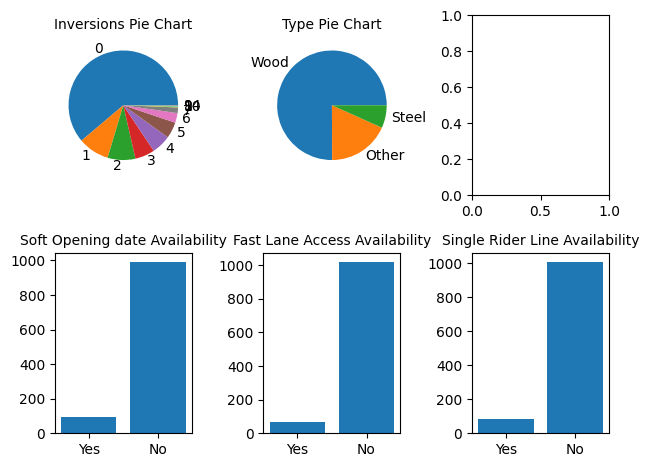

In [25]:
# Visualize Inversions, Type_Main, Soft opening date, Fast Lane available 
#and Single rider line available columns

# Create the figure and axes objects
fig, axes = plt.subplots(nrows=2, ncols=3)

# pLot Inversions column pie chart
axes[0,0].pie(coaster_df["Inversions_clean"].value_counts().values, 
              labels = coaster_df["Inversions_clean"].unique())
axes[0,0].set_title("Inversions Pie Chart", fontsize = 10)

# pLot Type_Main column pie chart
axes[0,1].pie(coaster_df["Type_Main"].value_counts().values, 
              labels = coaster_df["Type_Main"].unique())
axes[0,1].set_title("Type Pie Chart", fontsize = 10)

# pLot Soft opening date column bar chart
values = [coaster_copy["Soft opening date"].count(), 
          coaster_copy["Soft opening date"].isna().sum()]
labels = ["Yes", "No"]
axes[1,0].bar(labels, values)
axes[1,0].set_title("Soft Opening date Availability", fontsize = 10)

# pLot Fast Lane available column bar chart
values = [coaster_copy["Fast Lane available"].count(), 
          coaster_copy["Fast Lane available"].isna().sum()]
axes[1,1].bar(labels, values)
axes[1,1].set_title("Fast Lane Access Availability", fontsize = 10)

# pLot Single rider line available column bar chart
values = [coaster_copy["Single rider line available"].count(), 
          coaster_copy["Single rider line available"].isna().sum()]
axes[1,2].bar(labels, values)
axes[1,2].set_title("Single Rider Line Availability", fontsize = 10)

plt.tight_layout()
plt.show()


In order to visualize the key findings from the data exploration, the matplotlib subplots() function is first used to create a collection of graph, with 2 rows of graphs and 3 graphs on each row.

The matplotlib pie() function is then used to create a pie chart for the "Inversions_clean" and "Type_Main" columns at the specified positions in the subplots, e.g. axes[0,0] for the 1st position on the 1st row. The matplotlib bar() function was then used to create bar charts for the "Soft opening date", "Fast Lane available" and "Single rider line available" columns. The matplotlib tight_layout() function is used to set the spacing between the graphs and the show() function is used to display all the graphs.

# **9. Conclusion and Recommendation**

From the analysis conducted on the coaster_db dataset, it can be concluded that this dataset is very much unsuitable as a basis for the park's management to make any decision as out of the 56 columns of said dataset, only 6 of them do not contain missing values and for those that do, the count of null values range from about 100 to 1000, where the maximum count almost makes up for the total number of rows in the dataset. 

Additionally, the dataset contains multiple instances of redundant/duplicate columns such as "Soft opening date" and "Soft opening date.1" or "Opening Date", "Opened" and "opening_date_clean", where the latter set of columns all serve the same purpose of indicating the date where the roller coaster opened but each columns contains different values. In addtion to the inconsistent naming conventions of columns, this redundancy causes confusion and makes the data analysis process much more complicated. Furthermore, the format of the data is inconsistent in some columns such as "Duration" where some values are in the format <x min y seconds> and others in the format <#.##>

In conclusion, it is recommended to not refer to this specific dataset for decision making purposes as it contains too much redundancy and missing values to be a reliable source of information about the park's roller coasters. 